# Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + "png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format="png", dpi=resolution)

# Regression

Saving figure generated_linear_data_plot


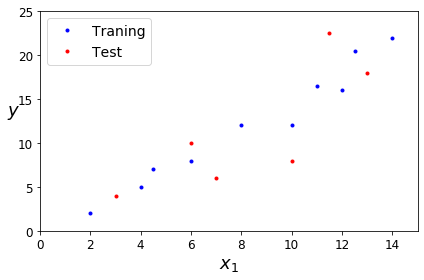

In [2]:
# Generate training set (two row vectors with 10 rows)
X = np.array([2, 4, 4.5, 6, 8, 12, 12.5, 10, 11, 14]).reshape((10, 1))
y = np.array([2, 5, 7, 8, 12, 16, 20.5, 12, 16.5, 22]).reshape((10, 1))

# Generate test set
X_test = np.array([3, 7, 10, 6, 11.5, 13]).reshape((6, 1))
y_test = np.array([4, 6, 8, 10, 22.5, 18]).reshape((6, 1))

# Plot graph
plt.plot(X, y, "b.", label="Traning")
plt.plot(X_test, y_test, "r.", label="Test")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 15, 0, 25])
save_fig("generated_linear_data_plot")
plt.show()

## Linear Regression

In [3]:
from sklearn.linear_model import LinearRegression

# Train on the training data set
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Saving figure linear_model_predictions_plot


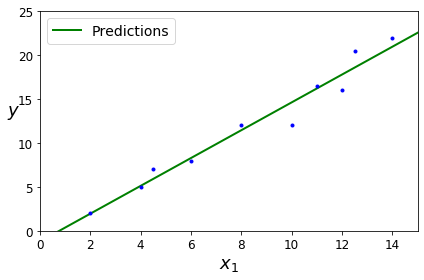

In [4]:
# Make predict between two X values
pred_line = np.array([0, 15]).reshape(-1, 1)
y_line_predict = lin_reg.predict(pred_line)

# Plot graph
plt.plot(pred_line, y_line_predict, "g-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 15, 0, 25])
save_fig("linear_model_predictions_plot")
plt.show()

1.6512425938117201
15.708478796230837
Saving figure linear_model_predictions_test_plot


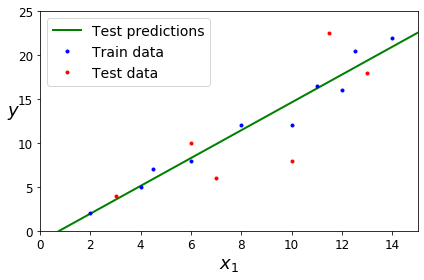

In [5]:
from sklearn.metrics import mean_squared_error

y_pred_train = lin_reg.predict(X)

# Meassure the performace of the model
lin_mse_train = mean_squared_error(y, y_pred_train)
print(lin_mse_train)


y_predict_test = lin_reg.predict(X_test)

# Meassure the model on the test data (its alot worse!)
lin_mse = mean_squared_error(y_test, y_predict_test)
print(lin_mse)



# Plot graph
plt.plot(pred_line, y_line_predict, "g-", linewidth=2, label="Test predictions")
plt.plot(X, y, "b.", label="Train data")
plt.plot(X_test, y_test, "r.", label="Test data")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 15, 0, 25])
save_fig("linear_model_predictions_test_plot")
plt.show()

# Classification using MNIST

In [6]:
from sklearn.datasets import fetch_openml

# Dataset from https://www.openml.org/d/554
mnist = fetch_openml('mnist_784')
print(mnist.keys())

X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])


__Data__ contain all data point and __Feature__ contains labes

In [7]:
split = 60000
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

Saving figure some_digit_plot


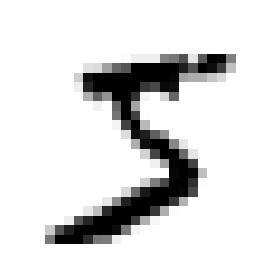

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt

first_digit = X[0]
zero_digit = X[1]
nine_digit = X[4]

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

plot_digit(first_digit)
save_fig("some_digit_plot")
plt.show()

Saving figure hundred_first_digits_plot


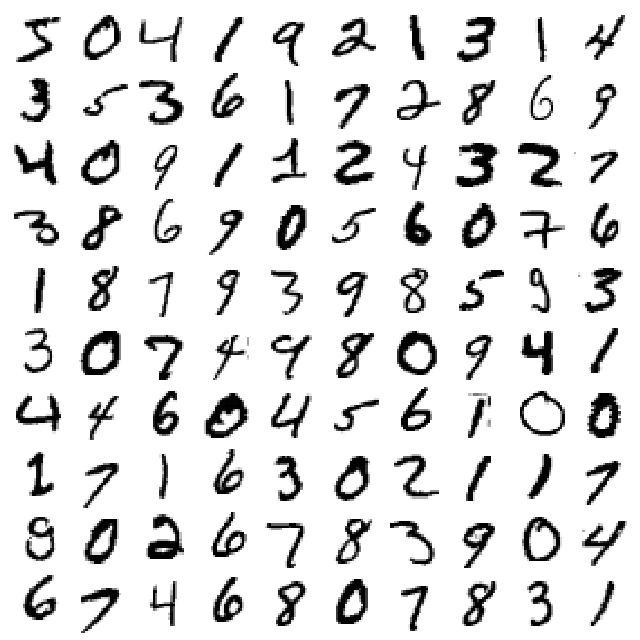

In [9]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")
    
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images)
save_fig("hundred_first_digits_plot", resolution=500)
plt.show()

##  Gradient Decent
### Binary Classification

In [10]:
from sklearn.linear_model import SGDClassifier

y_train_0 = (y_train == 0)
y_test_0 = (y_test == 0)

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_0)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
sgd_clf.predict([zero_digit, first_digit])

array([ True, False])

In [12]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_0, cv=3)

In [13]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_0, y_train_pred)

array([[53717,   360],
       [  507,  5416]], dtype=int64)

## Multiclass Classification
### Decision Trees

In [14]:
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(max_depth=20, min_samples_leaf=5)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [15]:
from graphviz import Source

print(tree_clf.get_depth())
#dot_data = tree.export_graphviz(tree_clf, out_file=os.path.join(IMAGES_PATH, "mnist_tree.dot"))
#Source.from_file(os.path.join(IMAGES_PATH, "mnist_tree.dot"))

20


In [16]:
tree_clf.predict([zero_digit, nine_digit])

array([0, 9], dtype=uint8)

#### Validation

[[5448    9   84   58   31   87   81   24   81   20]
 [  11 6412   79   59   10   38   24   26   64   19]
 [  91   81 5039  149  121   62   83  123  152   57]
 [  56   66  223 5042   49  269   39  101  188   98]
 [  36   52   89   37 5055   46   85   59   94  289]
 [ 111   77   54  271   91 4403  136   32  144  102]
 [  93   43  110   46  100  153 5227   14  112   20]
 [  33   47  157   74   79   43    8 5628   47  149]
 [  84  146  188  200  130  148   88   66 4634  167]
 [  39   41   64  121  258  111   30  155  162 4968]]
Saving figure tree_confusion_matrix_plot


C:\Users\null\.conda\envs\ml-example\lib\site-packages\ipykernel_launcher.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


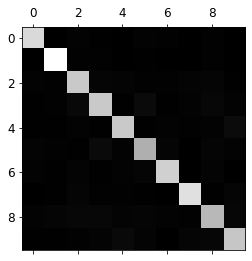

In [17]:
y_train_pred_tree = cross_val_predict(tree_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred_tree)
print(conf_mx)
plt.matshow(conf_mx, cmap=plt.cm.gray)
save_fig("tree_confusion_matrix_plot")
plt.show()

Saving figure tree_confusion_matrix_errors_plot


C:\Users\null\.conda\envs\ml-example\lib\site-packages\ipykernel_launcher.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


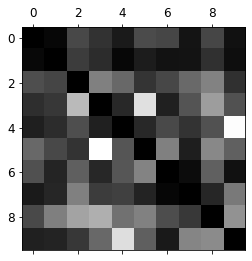

In [18]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("tree_confusion_matrix_errors_plot")
plt.show()

Saving figure error_analysis_digits_plot


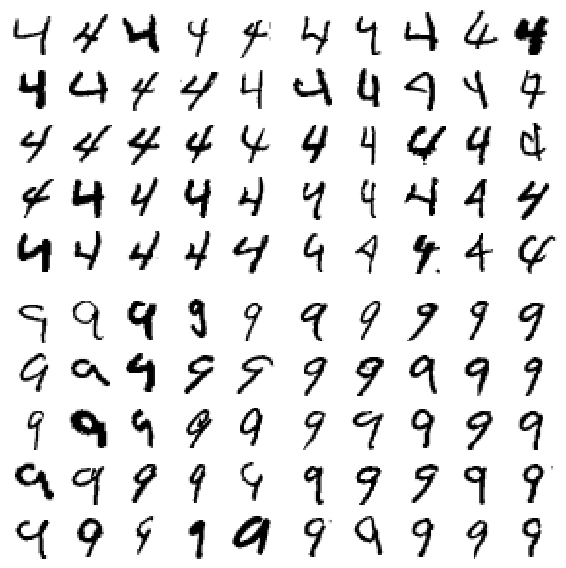

In [19]:
cl_a, cl_b = 4, 9
X_aa = X_train[(y_train == cl_a) & (y_train_pred_tree == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred_tree == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred_tree == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred_tree == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()

In [20]:
from sklearn.metrics import f1_score

y_test_pred_tree = cross_val_predict(tree_clf, X_test, y_test, cv=3)
print(f1_score(y_train, y_train_pred_tree, average=None))
print(f1_score(y_test, y_test_pred_tree, average=None))

[0.91371069 0.93496646 0.83669572 0.82737118 0.85925548 0.81680735
 0.89205564 0.90098455 0.80388585 0.83933097]
[0.85976543 0.89904265 0.74123223 0.73642252 0.75215408 0.6779476
 0.77150685 0.8        0.70746108 0.71865745]


### Nearest Neighbors

In [21]:
from sklearn.neighbors import KNeighborsClassifier
neigh_clf = KNeighborsClassifier()
neigh_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [22]:
neigh_clf.predict([zero_digit, nine_digit])

array([0, 9], dtype=uint8)

[[5882    4    5    0    1    5   19    1    2    4]
 [   2 6705   10    2    1    1    3   11    2    5]
 [  51   60 5695   15   11    4    9   87   17    9]
 [   8   16   39 5903    1   63    4   40   33   24]
 [   3   53    1    1 5628    0   13   11    2  130]
 [  14   18    4   67    6 5211   58    7   11   25]
 [  24   13    1    0    5   27 5846    0    2    0]
 [   4   68   14    3   20    1    0 6083    3   69]
 [  25   85   15   87   35  111   27   19 5381   66]
 [  19   13    5   45   46   12    5   79   15 5710]]
Saving figure neigh_confusion_matrix_plot


C:\Users\null\.conda\envs\ml-example\lib\site-packages\ipykernel_launcher.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


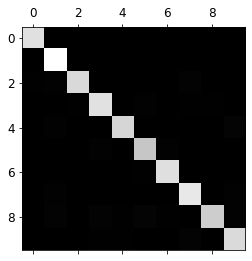

In [23]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred_neigh = cross_val_predict(neigh_clf, X_train, y_train, cv=3)
neigh_conf_mx = confusion_matrix(y_train, y_train_pred_neigh)
print(neigh_conf_mx)

plt.matshow(neigh_conf_mx, cmap=plt.cm.gray)
save_fig("neigh_confusion_matrix_plot")
plt.show()

Saving figure neigh_confusion_matrix_errors_plot


C:\Users\null\.conda\envs\ml-example\lib\site-packages\ipykernel_launcher.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


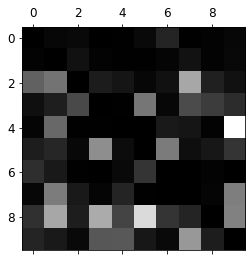

In [24]:
neigh_row_sums = neigh_conf_mx.sum(axis=1, keepdims=True)
norm_neigh_conf_mx = neigh_conf_mx / neigh_row_sums
np.fill_diagonal(norm_neigh_conf_mx, 0)
plt.matshow(norm_neigh_conf_mx, cmap=plt.cm.gray)
save_fig("neigh_confusion_matrix_errors_plot")
plt.show()

In [25]:
from sklearn.metrics import f1_score

print(f1_score(y_train, y_train_pred_neigh, average=None))

y_test_pred_neigh = cross_val_predict(neigh_clf, X_test, y_test, cv=3)
print(f1_score(y_test, y_test_pred_neigh, average=None))

[0.98402342 0.9733614  0.96960926 0.96344051 0.97067954 0.96002211
 0.98235591 0.96532572 0.95079071 0.95238095]
[0.97039639 0.94083333 0.93957704 0.93222818 0.9366306  0.92342598
 0.96740817 0.92204042 0.91689299 0.90764647]
